To get access to CLIMADA historical data, we need to set up the environment first. In VSCode, we need to install the Python and Jupyter extensions in the first place. Afterwards, in the left sidebar, select the “Extensions” symbol, enter “Python” in the search bar and click Install next to the “Python” extension. Repeat this process for “Jupyter”.

Open a Jupyter Notebook or create a new one. On the top right, click on Select Kernel, select Python Environments… and then choose the Python interpreter from the climada_env. 

In [92]:
from climada.hazard import TCTracks

In [93]:
# We want to get Indian Ocean's historical data, which is North Indian Ocean (NI) + South Indian Ocean (SI)

# We get the historical NI data first.
tc_hist_ni = TCTracks.from_ibtracs_netcdf(basin='NI', year_range=(1980, 2024))

# We get the historical SI data next.
tc_hist_si = TCTracks.from_ibtracs_netcdf(basin='SI', year_range=(1980, 2024))

2025-03-04 12:49:11,145 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\beste\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2025-03-04 12:49:59,294 - climada.hazard.tc_tracks - WARNING - 64 storm events are discarded because no valid wind/pressure values have been found: 1980284N09092, 1980290N10088, 1980317N11075, 1980338N09085, 1980345N09092, ...
2025-03-04 12:49:59,301 - climada.hazard.tc_tracks - WARNING - 1 storm events are discarded because only one valid timestep has been found: 1995269N21088.


c:\Users\beste\miniforge3\envs\climada_env\Lib\site-packages\climada\hazard\tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


2025-03-04 12:50:05,107 - climada.hazard.tc_tracks - WARNING - The cached IBTrACS data set dates from 2023-06-07 23:07:38 (older than 180 days). Very likely, a more recent version is available. Consider manually removing the file C:\Users\beste\climada\data\IBTrACS.ALL.v04r00.nc and re-running this function, which will download the most recent version of the IBTrACS data set from the official URL.
2025-03-04 12:51:46,147 - climada.hazard.tc_tracks - WARNING - 92 storm events are discarded because no valid wind/pressure values have been found: 1980015S18060, 1980032S14071, 1980056S15059, 1980068S13068, 1980075S11072, ...
2025-03-04 12:51:46,159 - climada.hazard.tc_tracks - WARNING - 12 storm events are discarded because only one valid timestep has been found: 1980002S15081, 1980005S11059, 1980009S14066, 1980010S20043, 1980010S22048, ...


c:\Users\beste\miniforge3\envs\climada_env\Lib\site-packages\climada\hazard\tc_tracks.py:614: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if ibtracs_ds.dims['storm'] == 0:


The best-track historical data from the International Best Track Archive for Climate Stewardship (IBTrACS) can easily be loaded into CLIMADA to study the historical records of TC events. The constructor from_ibtracs_netcdf() generates the Datasets for tracks selected by IBTrACS id, or by basin and year range. To achieve this, it downloads the first time the IBTrACS data v4 in netcdf format and stores it in ~/climada/data/. The tracks can be accessed later either using the attribute data or using get_track(), which allows to select tracks by its name or id.

In [94]:
# save the datasets
tc_hist_ni.write_hdf5('tc_hist_ni.hdf5')
tc_hist_si.write_hdf5('tc_hist_si.hdf5')

In [95]:
""" from climada.hazard import TropCyclone
from climada.hazard import Centroids
import numpy as np

# Manually merge by adding the events
tc_hist_merged = TCTracks()
tc_hist_merged.append(tc_hist_ni)
tc_hist_merged.append(tc_hist_si)

lats = np.arange(-40, 40, 1.0)  # Latitude range with 1-degree resolution
lons = np.arange(40, 120, 1.0)  # Longitude range with 1-degree resolution

centroids = Centroids.from_lat_lon(lats, lons)

# Convert to TropCyclone (which supports writing to HDF5)
tc_hazard = TropCyclone.from_tracks(tc_hist_merged, centroids)

# Save as HDF5
tc_hazard.write_hdf5("merged_tc_tracks_indian_ocean.hdf5") """

' from climada.hazard import TropCyclone\nfrom climada.hazard import Centroids\nimport numpy as np\n\n# Manually merge by adding the events\ntc_hist_merged = TCTracks()\ntc_hist_merged.append(tc_hist_ni)\ntc_hist_merged.append(tc_hist_si)\n\nlats = np.arange(-40, 40, 1.0)  # Latitude range with 1-degree resolution\nlons = np.arange(40, 120, 1.0)  # Longitude range with 1-degree resolution\n\ncentroids = Centroids.from_lat_lon(lats, lons)\n\n# Convert to TropCyclone (which supports writing to HDF5)\ntc_hazard = TropCyclone.from_tracks(tc_hist_merged, centroids)\n\n# Save as HDF5\ntc_hazard.write_hdf5("merged_tc_tracks_indian_ocean.hdf5") '

In [120]:
#load the datasets
tc_hist_ni = TCTracks.from_hdf5('tc_hist_ni.hdf5')
tc_hist_si = TCTracks.from_hdf5('tc_hist_si.hdf5')

In [121]:
tc_hist_ni.data


[<xarray.Dataset>
 Dimensions:                 (time: 20)
 Coordinates:
     lat                     (time) float32 8.1 8.2 8.293 8.4 ... 10.8 11.02 11.3
     lon                     (time) float32 102.1 101.9 101.8 ... 99.0 98.31 97.5
   * time                    (time) datetime64[ns] 1989-11-02T03:00:00 ... 198...
 Data variables:
     radius_max_wind         (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     radius_oci              (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     max_sustained_wind      (time) float32 19.5 27.83 27.83 ... 69.5 64.5 61.17
     central_pressure        (time) float32 998.0 994.0 994.0 ... 972.0 975.0
     environmental_pressure  (time) float64 1.005e+03 1.005e+03 ... 1.005e+03
     time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
     basin                   (time) <U2 'WP' 'WP' 'WP' 'WP' ... 'NI' 'NI' 'NI'
 Attributes:
     max_sustained_wind_unit:  kn
     central_pressure_unit:    mb
     orig_event_flag:       

In [122]:
listt = tc_hist_ni.subset({'category': any([1, 2, 3, 4, 5])}).data


In [123]:
listt

[<xarray.Dataset>
 Dimensions:                 (time: 33)
 Coordinates:
     lat                     (time) float32 11.0 11.5 12.0 ... 23.5 23.5 23.5
     lon                     (time) float32 69.5 69.0 68.5 ... 67.5 67.5 67.5
   * time                    (time) datetime64[ns] 1993-11-12 ... 1993-11-16
 Data variables:
     radius_max_wind         (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     radius_oci              (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
     max_sustained_wind      (time) float32 15.0 25.0 25.0 ... 30.0 22.0 15.0
     central_pressure        (time) float32 1.006e+03 1.004e+03 ... 1.008e+03
     environmental_pressure  (time) float64 1.008e+03 1.008e+03 ... 1.01e+03
     time_step               (time) float64 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
     basin                   (time) <U2 'NI' 'NI' 'NI' 'NI' ... 'NI' 'NI' 'NI'
 Attributes:
     max_sustained_wind_unit:  kn
     central_pressure_unit:    mb
     orig_event_flag:          True
     data

Number of tracks: 298


Text(0.5, 1.0, 'All historical tracks, NI')

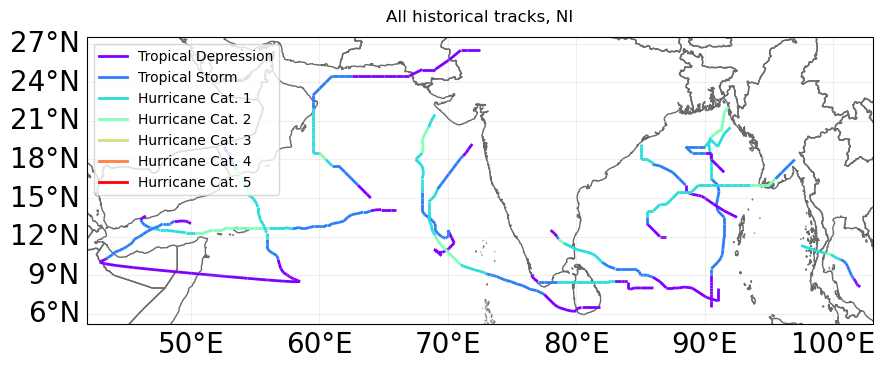

In [ ]:
# years 1990 and 1999 in basin NI.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well

print('Number of tracks:', tc_hist_ni.size)
ax = tc_hist_ni.plot();
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('All historical tracks, NI') # set title

Number of tracks: 782


Text(0.5, 1.0, 'All historical tracks, SI')

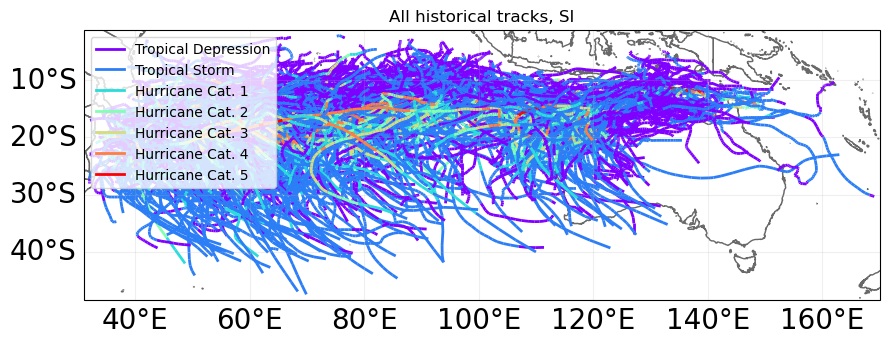

In [56]:
# years 1990 and 1999 in basin SI.
# correct_pres ignores tracks with not enough data. For statistics (frequency of events), these should be considered as well

print('Number of tracks:', tc_hist_si.size)
ax = tc_hist_si.plot();
ax.get_legend()._loc = 2 # correct legend location
ax.set_title('All historical tracks, SI') # set title

In [58]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

In [59]:
india_plant = pd.read_excel('India-Coal-Plant-Tracker-January-2025.xlsx')

In [60]:
india_plant_operating = india_plant.loc[india_plant['Status']=='operating', :]

In [61]:
map_india = gpd.read_file('india-polygon.shp')
map_india.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


<Axes: >

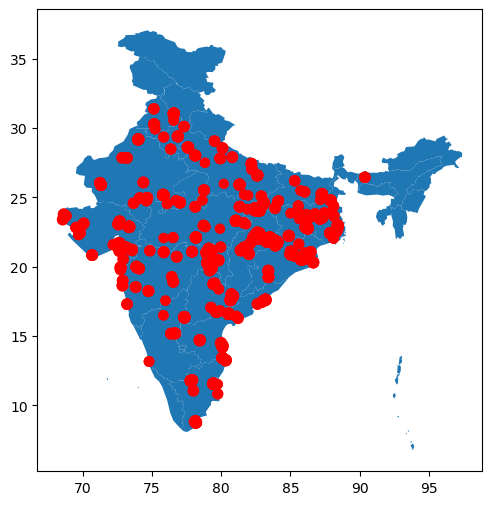

In [62]:
geometry = [Point(xy) for xy in zip(india_plant_operating['Longitude'], india_plant_operating['Latitude'])]
gdf = GeoDataFrame(india_plant_operating, geometry=geometry)   

#this is a simple map that goes with geopandas
# deprecated: world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=map_india.plot(figsize=(10, 6)), marker='o', color='red', markersize=india_plant_operating['Heat rate (Btu per kWh)']/200)

pandas.core.series.Series

In [148]:
import pandas as pd

pp = pd.read_excel('India-Coal-Plant-Tracker-January-2025.xlsx')
pp['Longitude']

0       81.979321
1       81.979321
2       81.979321
3       81.979321
4       87.135465
          ...    
1946    79.581184
1947    79.581184
1948    77.356120
1949    77.356120
1950    73.680000
Name: Longitude, Length: 1951, dtype: float64

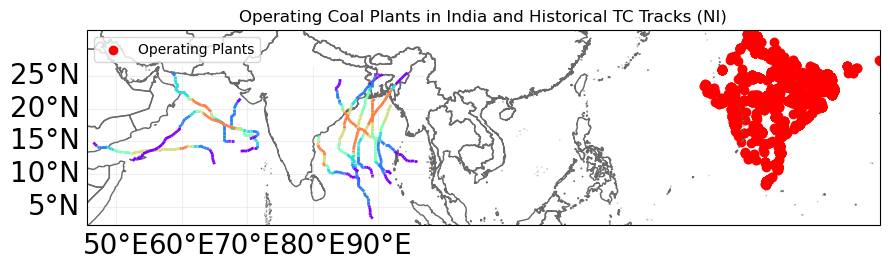

In [ ]:
""" import matplotlib.pyplot as plt

# Step 1: Plot TC tracks separately
tc_hist_ni.subset({"category": 4}).plot()

# Step 2: Get current figure and axis
fig = plt.gcf()
ax = plt.gca()

# Step 3: Overlay coal power plants
ax.scatter(pp['Longitude'], pp['Latitude'], 
           color='red', label='Operating Plants', marker='o')

# Step 4: Adjust axis limits to include both TC tracks and plant locations
ax.set_xlim([min(pp['Longitude'].min(), ax.get_xlim()[0]), max(pp['Longitude'].max(), ax.get_xlim()[1])])
ax.set_ylim([min(pp['Latitude'].min(), ax.get_ylim()[0]), max(pp['Latitude'].max(), ax.get_ylim()[1])])

# Step 4: Add title and legend
ax.set_title("Operating Coal Plants in India and Historical TC Tracks (NI)")
ax.legend()

# Show the final plot
plt.show()
 """

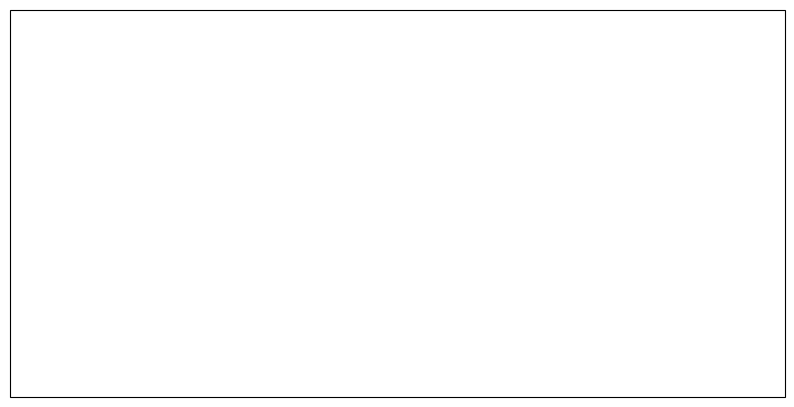

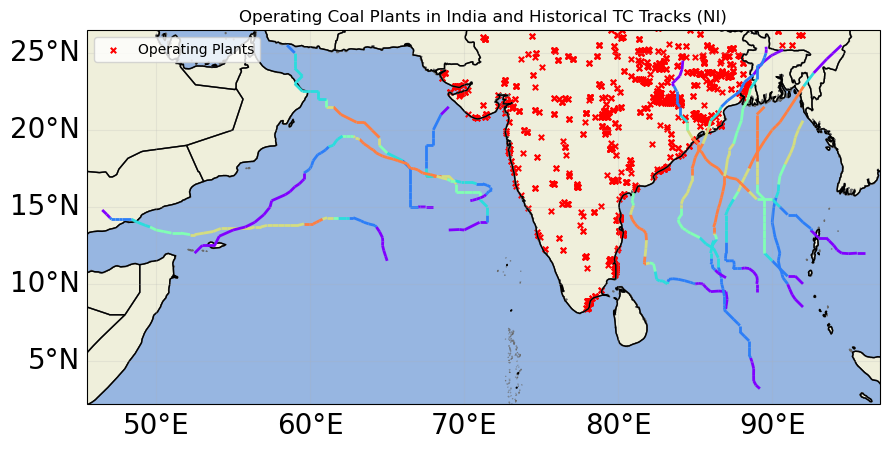

In [155]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Step 1: Set up the figure and axis with Cartopy projection (e.g., PlateCarree for lat/lon grid)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Step 2: Plot TC tracks for category 4
ax = tc_hist_ni.subset({"category": 4}).plot()

# Step 3: Add map features like coastlines, borders, and lakes
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Step 4: Overlay coal power plants
ax.scatter(pp['Longitude'], pp['Latitude'], 
           color='red', label='Operating Plants', marker='x', s=15, transform=ccrs.PlateCarree())

# Step 5: Add title and legend
ax.set_title("Operating Coal Plants in India and Historical TC Tracks (NI)")
ax.legend()

# Step 6: Show the final plot
plt.show()
